In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from scipy.stats import kendalltau
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
import sys

script_dir = os.path.dirname(os.getcwd()) 
parent_dir = os.path.join(script_dir)
sys.path.append(parent_dir)  

#from utils import compute_metrics

In [3]:
df = pd.read_csv('mnsol_summary.csv')
df

,EXP,OpenFF/TIP3P,ML/MM-ME,QM7-Species,Bespoke-Iter1-Species,Bespoke-Iter2-Species,Patched-Iter1-Species,Patched-Iter2-Species,Patched-Iter2-Refereence,Patched-Iter2-Species-LJ-Exp,Patched-Iter2-Species-LJ-MBIS
0,2.33,2.75,2.77,-1.17,1.34,1.33,1.13,1.21,1.32,2.24,1.19
1,2.89,3.05,2.87,-1.98,0.81,0.83,0.67,0.71,0.80,2.29,0.80
2,-0.87,-1.04,-1.07,0.57,-1.81,-1.96,-1.85,-1.84,-1.86,-1.05,-2.68
3,-2.39,-3.62,-3.60,-1.03,-3.69,-3.86,-3.50,-3.51,-3.78,-2.26,-4.07
4,-6.31,-6.40,-6.84,2.28,-9.98,-10.78,-8.47,-8.26,-7.78,-6.82,-7.58
5,-5.11,-3.93,-3.78,-3.17,-7.64,-7.69,-6.67,-6.48,-6.22,-5.18,-4.66
6,-5.87,-5.42,-6.56,-3.25,-8.41,-8.33,-7.93,-7.90,-8.09,-5.94,-6.18
7,-6.70,-6.97,-6.90,-8.31,-10.00,-9.71,-9.52,-9.32,-9.70,-7.01,-6.03
8,-5.05,-3.82,-3.78,-0.41,-5.04,-5.23,-6.08,-5.81,-5.75,-4.95,-5.06
9,-2.57,-3.11,-3.34,-4.44,-6.39,-6.22,-5.08,-4.58,-4.61,-2.46,-4.27


In [4]:
eps_07 = [
    1.74, 1.47, -1.19, -2.64, -6.90, -5.22, -6.42, -8.32, -4.83, -3.63, 
    -5.00, -3.31, -2.46, -10.48, -5.26, -3.80, -6.11, -10.32, -0.25, -1.83
]

eps_08 = [
    1.51, 1.20, -1.40, -2.89, -7.20, -5.62, -6.95, -8.62, -5.12, -3.94, 
    -5.33, -3.63, -2.83, -11.09, -5.52, -4.08, -6.11, -10.83, -0.52, -2.09
]

eps_09 = [
    1.39, 1.00, -1.61, -3.18, -7.69, -6.00, -7.43, -8.92, -5.46, -4.33, 
    -5.67, -3.97, -3.15, -11.56, -5.90, -4.44, -6.53, -11.54, -0.69, -2.38
]

data_patched = [
    1.73, 1.72, -2.30, -4.33, -3.85, -3.03, -5.85, -4.69, -3.12, -1.73,
    -4.47, -2.02, -2.90, -9.02, -5.18, -4.04, -5.11, -9.24, -0.19, -2.71]


data_qm7 = [
    1.69, 1.69, -1.92, -4.26, 0.38, -4.79, -7.13, -10.40, -2.76, -4.19,
    -6.16, -3.88, -2.67, -11.50, -4.20, -3.19, -4.44, -13.45, 0.92, -2.48
]

data_patched_rcubed = [1.25, 1.12, -2.65, -4.85, -4.48, -3.37, -6.40, -5.11,
                   -3.77, -2.30, -5.27, -2.73, -3.26, -9.07, -5.37, -4.31,
                   -5.67, -9.78, -0.47, -2.92]

data_qm7_rcubed = [1.21, 1.09, -2.27, -4.78, -0.25, -5.13, -7.68, -10.81,
                     -3.40, -4.75, -6.95, -4.59, -3.02, -11.55, -4.39, -3.46,
                     -4.99, -14.00, 0.63, -2.69]

data_new = [3.45, 4.42, -1.80, -2.84, -5.14, -4.55, -4.96, -6.30,
    -4.02, -2.36, -4.57, -2.78, -1.92, -9.05, -4.91, -5.05,
    -5.86, -11.09, 0.26, -1.10]

data_qm7_rcubed = [1.25, 0.88, -1.75, -3.51, -8.56, -6.54,
                   -7.89, -9.82, -6.09, -4.78, -6.18, -4.38, -3.50,
                   -12.66, -6.19, -5.20, -7.38, -12.46, -1.51, -2.76]




df['QM7-Species-LJ'] = data_qm7_rcubed
df['Patched-Iter2-Species-LJ-DES370K']= data_new


In [11]:
list(df['EXP'])

[2.33,
 2.89,
 -0.87,
 -2.39,
 -6.31,
 -5.11,
 -5.87,
 -6.7,
 -5.05,
 -2.57,
 -3.91,
 -3.53,
 -2.22,
 -9.51,
 -3.89,
 -4.7,
 -5.49,
 -10.9,
 -1.05,
 -2.73]

In [5]:
# new dataset with OpenFF/TIP3P, QM7, Bespoke-Iter2-Species, Patched-Iter2-Species

# create new dataset
df_new = pd.DataFrame()
df_new['EXP'] = df['EXP']
df_new['General Model'] = df['QM7-Species']
df_new['General Model-LJ'] = df['QM7-Species-LJ']
df_new['Patched'] = df['QM7-Species-LJ']
df_new['Patched-LJ'] = df['Patched-Iter2-Species-LJ-DES370K']
df = df_new

0     3.50
1     4.87
2    -1.44
3    -1.36
4    -8.59
5    -1.94
6    -2.62
7     1.61
8    -4.64
9     1.87
10    0.00
11   -0.85
12   -1.28
13   -4.25
14   -2.48
15   -5.46
16   -4.54
17   -5.42
18   -2.16
19   -3.03
dtype: float64


NameError: name 'compute_metrics' is not defined

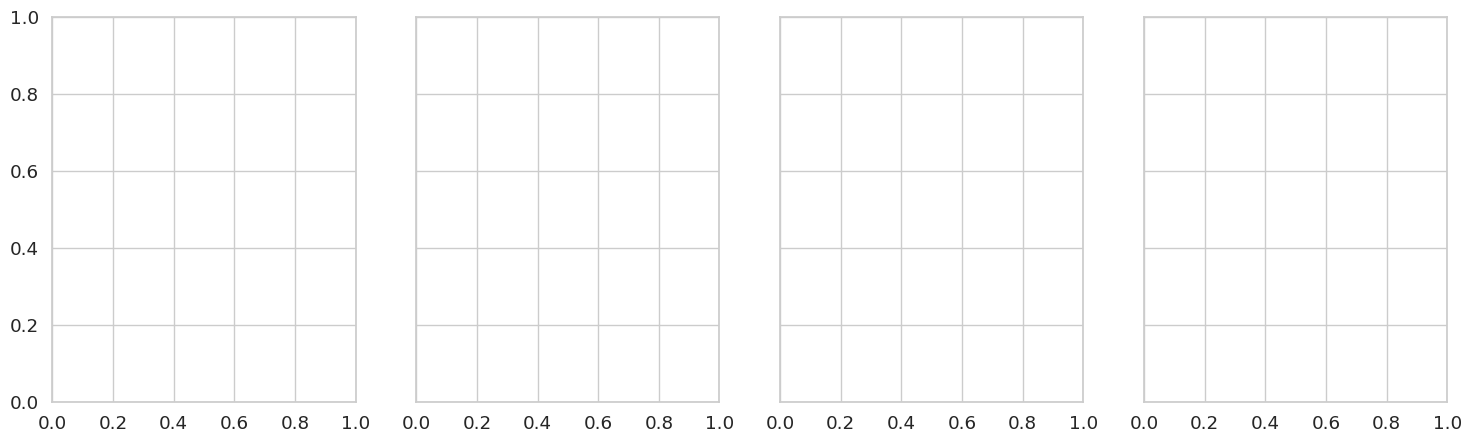

In [6]:
sns.set(style='whitegrid', font_scale=1.2)

columns_to_plot = df.columns[1:] # Exclude 'EXP'
num_plots = len(columns_to_plot)
ncols = 4
nrows = (num_plots + ncols - 1) // ncols 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows), sharex=True, sharey=True)

axes = axes.flatten()
xx = np.linspace(-100, 100, 100)
yy = xx

for i, column in enumerate(columns_to_plot):
    x = df['EXP']
    y = df[column]


    print(x-y)
    
    # Calculate statistics
    mue, mse, kendall, pearson, r2, rmse = compute_metrics(x, y)
  
    sns.lineplot(ax=axes[i], x=xx, y=yy, color='black', linestyle='--')
    sns.scatterplot(ax=axes[i], x=x, y=y, s=100, alpha=0.75)
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel(r'$\Delta G^{ML/MM}_{vac \rightarrow sol}$ [kcal.mol$^{-1}$]')
    axes[i].set_xlabel(r'$\Delta G^{EXP}$ [kcal.mol$^{-1}$]')
    
    stats_text = f"RMSE: {rmse:.2f}\nMSE: {mse:.2f}\nKendall's Tau: {kendall:.2f}\nR$^2$: {r2:.2f}\nPearson: {pearson:.2f}"

    axes[i].text(
        0.05,
        0.95,
        f"R$^2$: {r2:.2f}\nRMSE: {rmse:.2f} \nMUE: {mue:.2f}\nMSE: {mse:.2f}\nKendall $\\tau$: {kendall:.2f}\nPearson $\\rho$: {pearson:.2f}",
        transform=axes[i].transAxes,
        fontsize=12,
        verticalalignment="top",
        horizontalalignment="left",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3",alpha=0.5),
    )
    axes[i].grid(True)
    axes[i].set_xlim(-15, 5)
    axes[i].set_ylim(-15, 5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

for ax in axes:
    ax.set_aspect('equal', 'box')


# reduce vertical space between subplots
plt.tight_layout(pad=0)  
# plt.savefig('fig4_ahfe_benchmark.pdf', bbox_inches='tight', dpi=300)
plt.show()